<a href="https://colab.research.google.com/github/Gssstabobbdilla/COMPAS-/blob/main/COMPAS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Subimos el dataset

from google.colab import files
uploaded = files.upload()

Saving ._propublica_data_for_fairml.csv to ._propublica_data_for_fairml.csv
Saving compas-scores-raw.csv to compas-scores-raw.csv
Saving cox-violent-parsed.csv to cox-violent-parsed.csv
Saving cox-violent-parsed_filt.csv to cox-violent-parsed_filt.csv
Saving propublica_data_for_fairml.csv to propublica_data_for_fairml.csv


In [3]:
  df1 = pd.read_csv("compas-scores-raw.csv")
  df2 = pd.read_csv("cox-violent-parsed.csv")
  df3 = pd.read_csv("cox-violent-parsed_filt.csv")
  df4 = pd.read_csv("propublica_data_for_fairml.csv")


# Análisis Exploratorio

## Archivo 1

In [4]:
df1.shape

(60843, 28)

In [5]:
df1.columns

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15624 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 
 14  LegalStatus           

In [7]:
df1.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


## Archivo 2

In [8]:
df2.shape

(18316, 52)

In [9]:
df2.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event'],
      dtype='object')

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11001 non-null  float64
 1   name                     18316 non-null  object 
 2   first                    18316 non-null  object 
 3   last                     18316 non-null  object 
 4   compas_screening_date    18316 non-null  object 
 5   sex                      18316 non-null  object 
 6   dob                      18316 non-null  object 
 7   age                      18316 non-null  int64  
 8   age_cat                  18316 non-null  object 
 9   race                     18316 non-null  object 
 10  juv_fel_count            18316 non-null  int64  
 11  decile_score             18316 non-null  int64  
 12  juv_misd_count           18316 non-null  int64  
 13  juv_other_count          18316 non-null  int64  
 14  priors_count          

In [11]:
df2.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,...,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,...,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,...,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0


In [38]:
df2["sex"].value_counts()
df2["sex"] = df2["sex"].map({"Male": 0, "Female": 1})

In [69]:
df2_worace.columns


Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'days_b_screening_arrest',
       'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date',
       'c_arrest_date', 'c_days_from_compas', 'c_charge_degree',
       'c_charge_desc', 'is_recid', 'r_case_number', 'r_charge_degree',
       'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in',
       'r_jail_out', 'violent_recid', 'is_violent_recid', 'vr_case_number',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Native American', 'race_Other'],
      dtyp

## Archivo 3

In [12]:
df3.shape

(18316, 40)

In [13]:
df3.columns

Index(['id', 'name', 'first', 'last', 'sex', 'dob', 'age', 'age_cat', 'race',
       'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
       'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'violent_recid', 'is_violent_recid',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'priors_count.1', 'event'],
      dtype='object')

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11001 non-null  float64
 1   name                     18316 non-null  object 
 2   first                    18316 non-null  object 
 3   last                     18316 non-null  object 
 4   sex                      18316 non-null  object 
 5   dob                      18316 non-null  object 
 6   age                      18316 non-null  int64  
 7   age_cat                  18316 non-null  object 
 8   race                     18316 non-null  object 
 9   juv_fel_count            18316 non-null  int64  
 10  decile_score             18316 non-null  int64  
 11  juv_misd_count           18316 non-null  int64  
 12  juv_other_count          18316 non-null  int64  
 13  priors_count             18316 non-null  int64  
 14  days_b_screening_arres

In [15]:
df3.head()

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0


## Archivo 4

In [16]:
df4.shape

(6172, 12)

In [17]:
df4.columns

Index(['Two_yr_Recidivism', 'Number_of_Priors', 'score_factor',
       'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American',
       'Asian', 'Hispanic', 'Native_American', 'Other', 'Female',
       'Misdemeanor'],
      dtype='object')

In [18]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6172 entries, 0 to 6171
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Two_yr_Recidivism     6172 non-null   int64
 1   Number_of_Priors      6172 non-null   int64
 2   score_factor          6172 non-null   int64
 3   Age_Above_FourtyFive  6172 non-null   int64
 4   Age_Below_TwentyFive  6172 non-null   int64
 5   African_American      6172 non-null   int64
 6   Asian                 6172 non-null   int64
 7   Hispanic              6172 non-null   int64
 8   Native_American       6172 non-null   int64
 9   Other                 6172 non-null   int64
 10  Female                6172 non-null   int64
 11  Misdemeanor           6172 non-null   int64
dtypes: int64(12)
memory usage: 578.8 KB


In [19]:
df4.head()

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,4,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1
4,1,14,1,0,0,0,0,0,0,0,0,0


# Análisis de datos

In [47]:
df2.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'days_b_screening_arrest',
       'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date',
       'c_arrest_date', 'c_days_from_compas', 'c_charge_degree',
       'c_charge_desc', 'is_recid', 'r_case_number', 'r_charge_degree',
       'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in',
       'r_jail_out', 'violent_recid', 'is_violent_recid', 'vr_case_number',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Native American', 'race_Other'],
      dtyp

In [48]:
df2.isnull().sum()

,0
id,7315
name,0
first,0
last,0
compas_screening_date,0
sex,18316
dob,0
age,0
age_cat,0
juv_fel_count,0


In [49]:
df2["is_recid"].value_counts()

,count
is_recid,
0,9079
1,8417
-1,820


In [50]:
# Nosotros trabajaremos con los valores >= 0, ya que los valores -1, significan
# que la persona no tuvo seguimiento completo %%

In [51]:
df = df2[df2['is_recid'] != -1]

In [52]:
df['is_recid'].value_counts(normalize=True)

,proportion
is_recid,
0,0.518919
1,0.481081


In [53]:
df[['age','priors_count', 'decile_score']].describe()

,age,priors_count,decile_score
count,17496.000000,17496.000000,17496.000000
mean,33.950446,4.096594,5.036123
std,11.602510,5.352917,2.933318
min,18.000000,0.000000,-1.000000
25%,25.000000,1.000000,2.000000
50%,31.000000,2.000000,5.000000
75%,41.000000,6.000000,8.000000
max,96.000000,43.000000,10.000000


In [54]:
# # Vemos que el valor minimo de la edad es 18, lo cual es normal, ya que es la
# edad minima para ser procesado judicialmente
# En prior counts, no es normal tener 43 precedentes, por lo cual, este peude
# ser un outlayer
# El valor minimo de decile_score es -1, por lo cual debemos de
# corregir esto, ya que la escala es de 1 a 10 %%

In [55]:
print("Densidad: ", 23/len(df))
df["decile_score"].value_counts()
df[df["decile_score"] == -1]['is_recid'].value_counts()
# Los datos no están concentrados en una sola clase, por lo cual, no afectará
# demasiado si eliminamos estas filas que contienien datos extraños
df = df[df["decile_score"] != -1]

Densidad:  0.001314586191129401


# Análisis Univariado

In [30]:
key_columns = ["age", "race", "sex", "priors_count","decile_score", "is_recid"]
compas_df = df[key_columns]

In [31]:
#Separemos a las variables numéricas
num_vars = list(compas_df.select_dtypes(["int64", "float64"]).columns)

print("Estadística descriptiva")
compas_df[num_vars].describe().round(2)


Estadística descriptiva


,age,priors_count,decile_score,is_recid
count,17479.00,17479.00,17479.00,17479.00
mean,33.94,4.10,5.04,0.48
std,11.60,5.35,2.93,0.50
min,18.00,0.00,1.00,0.00
25%,25.00,1.00,2.00,0.00
50%,31.00,2.00,5.00,0.00
75%,41.00,6.00,8.00,1.00
max,96.00,43.00,10.00,1.00


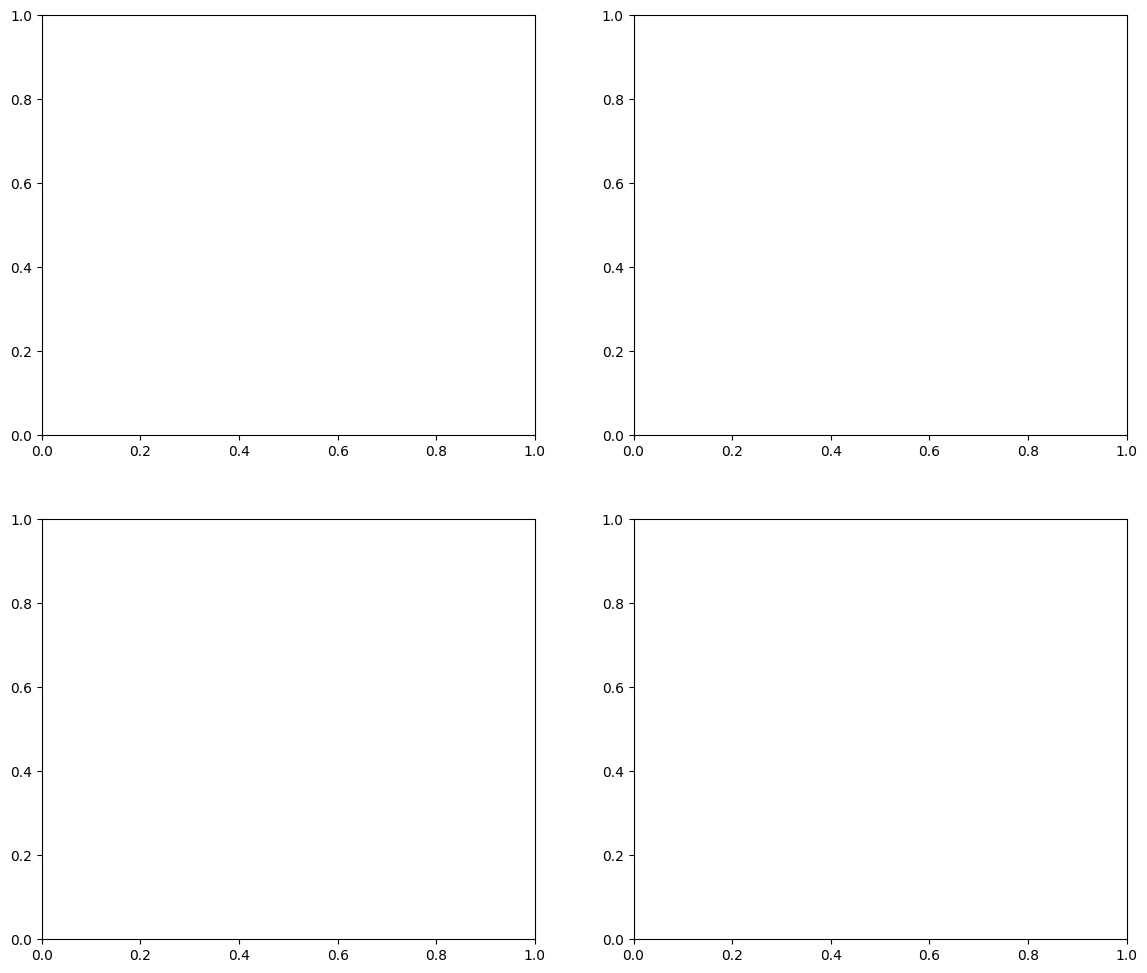

In [34]:
fig, axes = plt.subplots(2,2, figsize = (14,12))

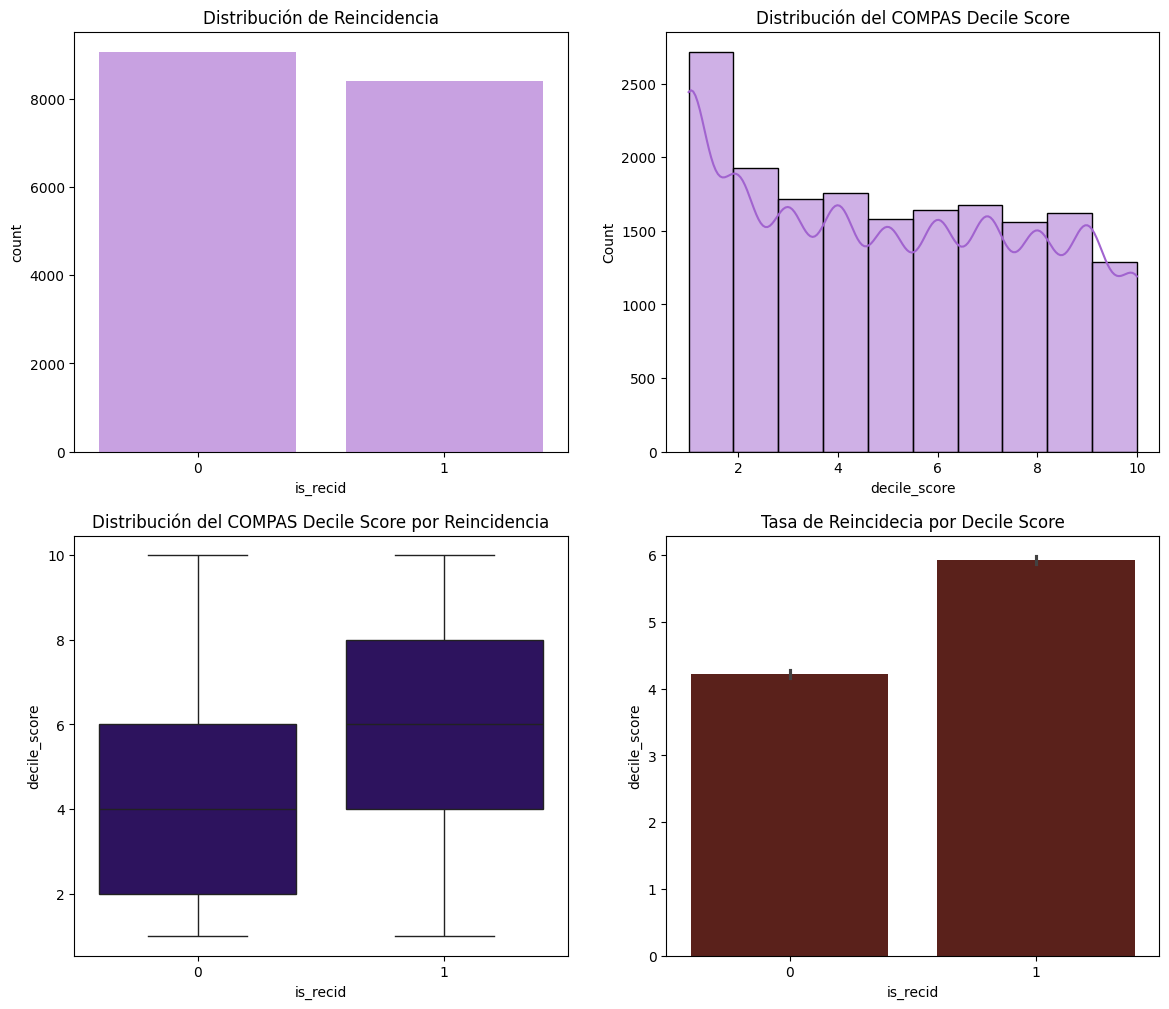

In [35]:
sns.countplot(ax = axes[0,0],
              data = compas_df,
              x = "is_recid",
              color = "#CA96EC").set(title= "Distribución de Reincidencia")

sns.histplot(ax = axes[0,1],
             data=compas_df,
             x="decile_score",
             bins=10,
             kde = True,
             color = "#A163CF").set(title ="Distribución del COMPAS Decile Score")

sns.boxplot(ax = axes[1,0],
            data = compas_df,
            x = "is_recid",
            y = "decile_score",
            color = "#29066B").set(title = "Distribución del COMPAS Decile Score por Reincidencia")

sns.barplot(ax = axes[1,1],
            data = compas_df,
            x = "is_recid",
            y = "decile_score",
            color = "#641811").set(title = "Tasa de Reincidecia por Decile Score")

fig

In [ ]:
# Se observa una diferencia clara en la distribución del decile score entre
# reincidentes y no reincidentes. Los individuos que reinciden presentan una
# mediana y promedio significativamente mayores. Sin embargo, existe una
# considerable superposición entre grupos, lo que indica que el score no separa
# perfectamente ambas poblaciones. %%

In [83]:
# Ya vimos que el score es mayor en reincidentes, ahora la pregunta que surge es
# ¿La tasa de reincidencia aumenta conforme aumenta el decile score?

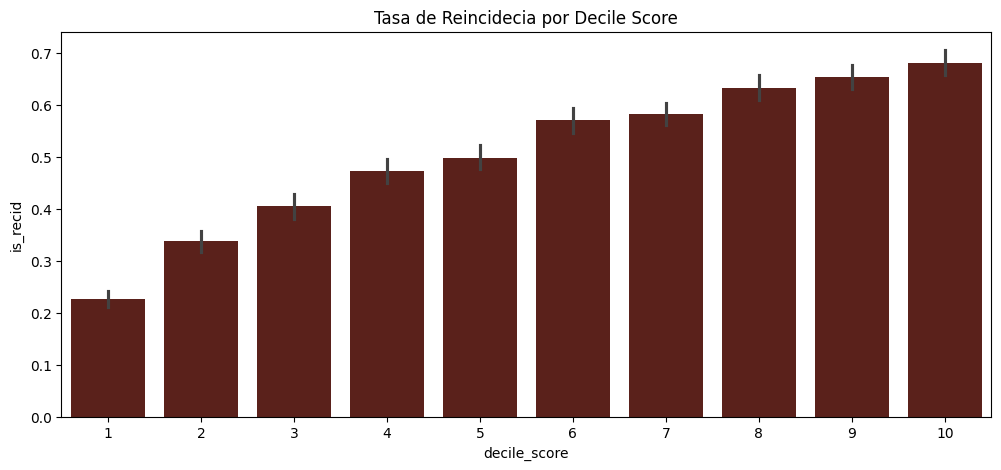

In [85]:
plt.subplots(figsize = (12,5))
sns.barplot(data = compas_df,
            x = "decile_score",
            y = "is_recid",
            color = "#641811").set(title = "Tasa de Reincidecia por Decile Score")

plt.show()

In [ ]:
# El barplot muestra una relación claramente creciente y monotónica entre el
# decile_score y la proporción de individuos que reinciden. %%

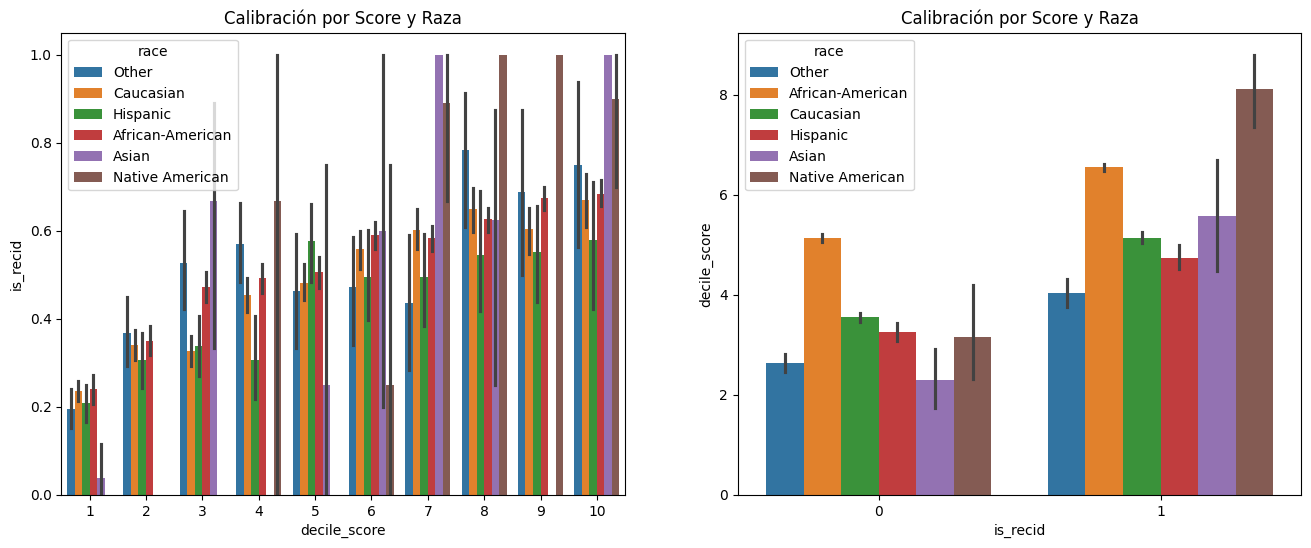

In [91]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
sns.barplot(ax = axes[0],
    data=compas_df,
    x="decile_score",
    y="is_recid",
    hue="race"
).set(title = "Calibración por Score y Raza")

sns.barplot(ax = axes[1],
    data=compas_df,
    x="is_recid",
    y="decile_score",
    hue="race"
).set(title = "Calibración por Score y Raza")

plt.show()

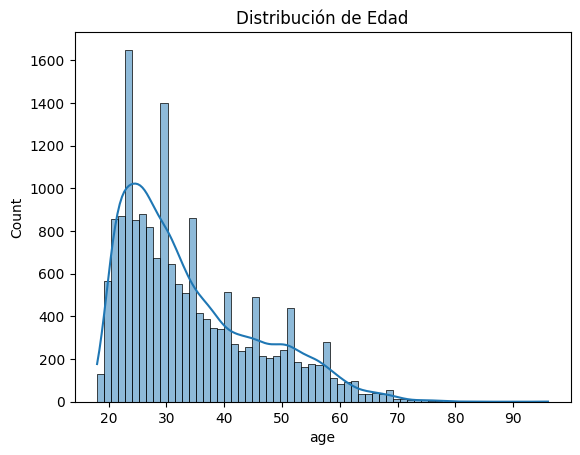

In [65]:
sns.histplot(data=compas_df,
             x = "age",
             kde = True).set(title = "Distribución de Edad")
plt.show()

In [66]:
# La distribución de edad presenta asimetría positiva, concentrándose
# principalmente entre los 20 y 35 años. Esto sugiere que la población
# analizada está compuesta mayoritariamente por adultos jóvenes, consistente
# con la literatura criminológica que indica mayor incidencia delictiva en
# edades tempranas.

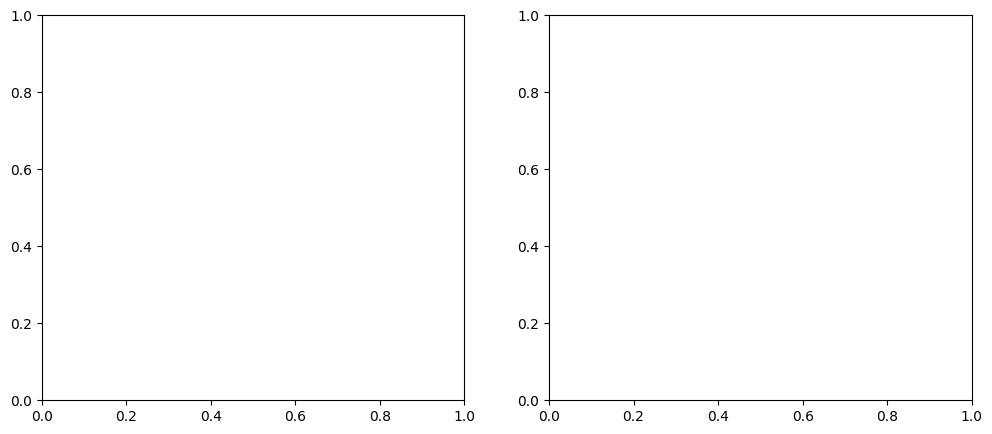

In [81]:
fig, axes = plt.subplots(1,2, figsize = (12,5))

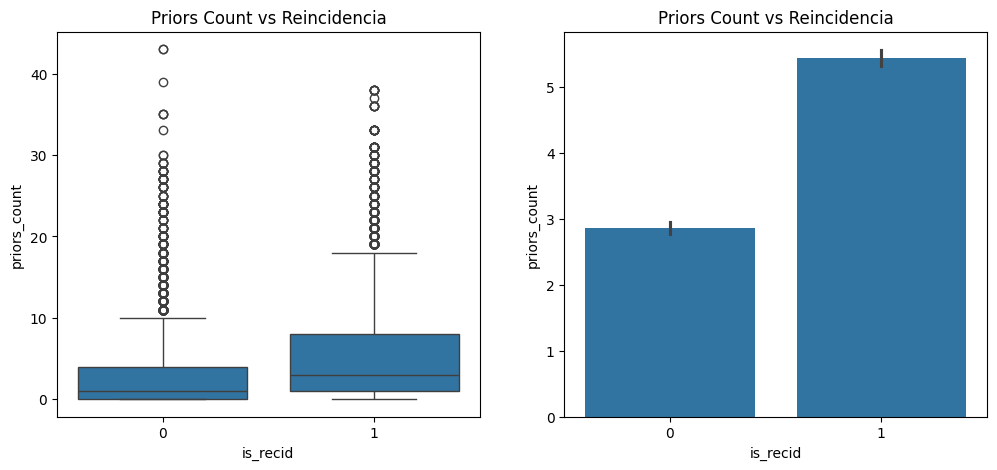

In [82]:
sns.boxplot(ax = axes[0],
    data=compas_df,
    x="is_recid",
    y="priors_count").set(title = "Priors Count vs Reincidencia")

sns.barplot(ax = axes[1],
    data=compas_df,
    x="is_recid",
    y="priors_count"
).set(title = "Priors Count vs Reincidencia")

fig

In [72]:
# Se observa una diferencia clara en la mediana y dispersión del número de
# antecedentes entre reincidentes y no reincidentes. Los individuos que
# reinciden presentan, en promedio, un mayor número de antecedentes previos, lo
# que sugiere que esta variable posee poder predictivo relevante.